# Class 2 Task 3
<b>The goal of this task is to build a model that can accuarately predict default rates and/or credit limits for potential customers, using the Credit One database previously analyzed in Task 2.

In [21]:
#DS Basics
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt


#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report

#cross validation
from sklearn.model_selection import train_test_split

#classifiers
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [2]:
#importing data from previous EDA and cleaning
rawData = pd.read_csv('full_df.csv', index_col=0)
# Make all column names lowercase - I can't keep holding down the shift key
rawData.columns= rawData.columns.str.lower()
rawData.head()

,limit_bal,marriage,age,l_education,sex,education_graduate school,education_high school,education_other,education_university,default_status,...,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
1,20000,1,24,3,1,0,0,0,1,1,...,689,0,0,0,0,689,0,0,0,0
2,120000,2,26,3,1,0,0,0,1,1,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,90000,2,34,3,1,0,0,0,1,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,50000,1,37,3,1,0,0,0,1,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,50000,1,57,3,0,0,0,0,1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [3]:
#importing smaller dataset in case I need it
lessData = pd.read_csv('clean_df.csv', index_col=0)
lessData.head()

,limit_bal,marriage,age,l_education,sex,education_graduate school,education_high school,education_other,education_university,default_status,limit_cat,months_behind
1,20000,1,24,3,1,0,0,0,1,1,0,0
2,120000,2,26,3,1,0,0,0,1,1,1,2
3,90000,2,34,3,1,0,0,0,1,0,1,0
4,50000,1,37,3,1,0,0,0,1,0,0,0
5,50000,1,57,3,0,0,0,0,1,0,0,0


# First attempt - Use Linear Regression to predict Default Status

In [4]:
#features
X = rawData.copy()
X.drop(columns=['l_education', 'limit_cat', 'default_status', 'months_behind'], inplace = True)
print('Summary of feature sample')
X.head()

Summary of feature sample


,limit_bal,marriage,age,sex,education_graduate school,education_high school,education_other,education_university,pay_0,pay_2,...,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
1,20000,1,24,1,0,0,0,1,2,2,...,689,0,0,0,0,689,0,0,0,0
2,120000,2,26,1,0,0,0,1,-1,2,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,90000,2,34,1,0,0,0,1,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,50000,1,37,1,0,0,0,1,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,50000,1,57,0,0,0,0,1,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [5]:
#dependent variable
y = rawData['default_status']

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30203
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   limit_bal                  30000 non-null  int64
 1   marriage                   30000 non-null  int64
 2   age                        30000 non-null  int64
 3   sex                        30000 non-null  int64
 4   education_graduate school  30000 non-null  int64
 5   education_high school      30000 non-null  int64
 6   education_other            30000 non-null  int64
 7   education_university       30000 non-null  int64
 8   pay_0                      30000 non-null  int64
 9   pay_2                      30000 non-null  int64
 10  pay_3                      30000 non-null  int64
 11  pay_4                      30000 non-null  int64
 12  pay_5                      30000 non-null  int64
 13  pay_6                      30000 non-null  int64
 14  bill_amt1             

In [7]:
#dependent variable
print(y)

1        1
2        1
3        0
4        0
5        0
        ..
30199    0
30200    0
30201    1
30202    1
30203    1
Name: default_status, Length: 30000, dtype: int64


In [8]:
model = LinearRegression(n_jobs=10)

In [9]:
print(cross_val_score(model, X, y, cv=3)) 

[0.10524747 0.13311847 0.12469405]


<H2>These numbers do not look good. Time to try another way.

# Second Attempt - Use Linear Regression to predict Credit Limit

In [11]:
#features - this time setting credit limit as Y and everything else as X
X = rawData.copy()
X.drop(columns=['limit_bal','l_education', 'limit_cat', 'months_behind'], inplace = True)
print('Summary of feature sample')
X.head()

Summary of feature sample


,marriage,age,sex,education_graduate school,education_high school,education_other,education_university,default_status,pay_0,pay_2,...,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
1,1,24,1,0,0,0,1,1,2,2,...,689,0,0,0,0,689,0,0,0,0
2,2,26,1,0,0,0,1,1,-1,2,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,2,34,1,0,0,0,1,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,1,37,1,0,0,0,1,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,1,57,0,0,0,0,1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [12]:
#dependent variable
y = rawData['limit_bal']

In [13]:
model = LinearRegression(n_jobs=10)
print(cross_val_score(model, X, y, cv=3)) 

[0.35681669 0.38049759 0.33728254]


<b>These numbers are a bit better (0.38 instead of 0.13) I will try other Regressors to see what the best model I can get with these features

In [14]:
algosClass = []
algosClass.append(('Random Forest Regressor',RandomForestRegressor()))
algosClass.append(('Linear Regression',LinearRegression()))
algosClass.append(('Support Vector Regression',SVR()))

#regression
results = []
names = []

for name, model in algosClass:
    result = cross_val_score(model, X,y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)

for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor 0.4664145434805736
Linear Regression 0.3581989426608166
Support Vector Regression -0.05037380099684693


<b>Random Forest Regressor has the highest cross_val_score of 0.47 so I will proceed with it, even though that still seems low.

In [15]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 523)

In [16]:
algo = RandomForestRegressor()
model = algo.fit(X_train,y_train)

In [17]:
predictions = model.predict(X_test)

In [18]:
#Make Predictions
predictions = model.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.471
RMSE: 94510.804


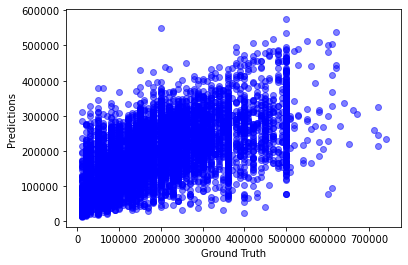

In [19]:
plt.scatter(y_test, predictions, color=['blue'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

<B>As the R squared and cross validation score shows - linear regression to predict credit limit is not a great method.

# New tactic - Use a classifier algorithm to classify customers are default/not default

In [22]:
#features
X = rawData.copy()
X.drop(columns=['l_education', 'limit_cat', 'default_status', 'months_behind'], inplace = True)
print('Summary of feature sample')
X.head()

Summary of feature sample


,limit_bal,marriage,age,sex,education_graduate school,education_high school,education_other,education_university,pay_0,pay_2,...,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
1,20000,1,24,1,0,0,0,1,2,2,...,689,0,0,0,0,689,0,0,0,0
2,120000,2,26,1,0,0,0,1,-1,2,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,90000,2,34,1,0,0,0,1,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,50000,1,37,1,0,0,0,1,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,50000,1,57,0,0,0,0,1,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [23]:
#dependent variable
y = rawData['default_status']

In [24]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [25]:
#Modeling (Classification)
algo = DecisionTreeClassifier(max_depth=4)
model = algo.fit(X_train,y_train)

#Predictions
preds = model.predict(X_test)

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7052
           1       0.66      0.37      0.47      1948

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



<b>So using Decision Tree Clasifier yielded not-bad results. 80% accuracy when given a credit limit, demographic data, and payment history. Next I'll try some other classifier algorithms.

In [26]:
print(cross_val_score(model, X, y, cv=3)) # cv = number of folds being held out

[0.8112 0.8259 0.8212]


<b> Cross Validation Score of 83% for Decision Tree Classifier

In [27]:
# Testing a few classification algorithms
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class.append(('Gradient Boosting Classifier', GradientBoostingClassifier()))

#classification
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, X,y, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)
    
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.8155333333333333
Decision Tree Classifier 0.7246333333333332
Gradient Boosting Classifier 0.8202333333333334


<b>From this test, it looks like Gradient Boosting Classifier had the best results. I will test it further.

In [30]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 523)

In [31]:
#Modeling (Classification)
algo = GradientBoostingClassifier()
model = algo.fit(X_train,y_train)

#Predictions
preds = model.predict(X_test)

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      6988
           1       0.68      0.35      0.46      2012

    accuracy                           0.82      9000
   macro avg       0.76      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



In [32]:
print(cross_val_score(model, X, y, cv=3))

[0.8103 0.8242 0.8261]


In [39]:
#Modeling (Classification)
algo = DecisionTreeClassifier(max_depth=2)
model = algo.fit(X_train,y_train)

#Predictions
preds = model.predict(X_test)

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      6988
           1       0.71      0.30      0.42      2012

    accuracy                           0.82      9000
   macro avg       0.77      0.63      0.66      9000
weighted avg       0.80      0.82      0.79      9000



In [40]:
print(cross_val_score(model, X, y, cv=3))

[0.8098 0.8257 0.8231]


# Tested several times, two classifier algorthims performed equally well - Decision Tree Classifier and Gradient Boosting Classifier. They were able to predict with 83% accuracy whether a customer would default or not. This approach is more appropriate than using a Linear Regressor algorithm.

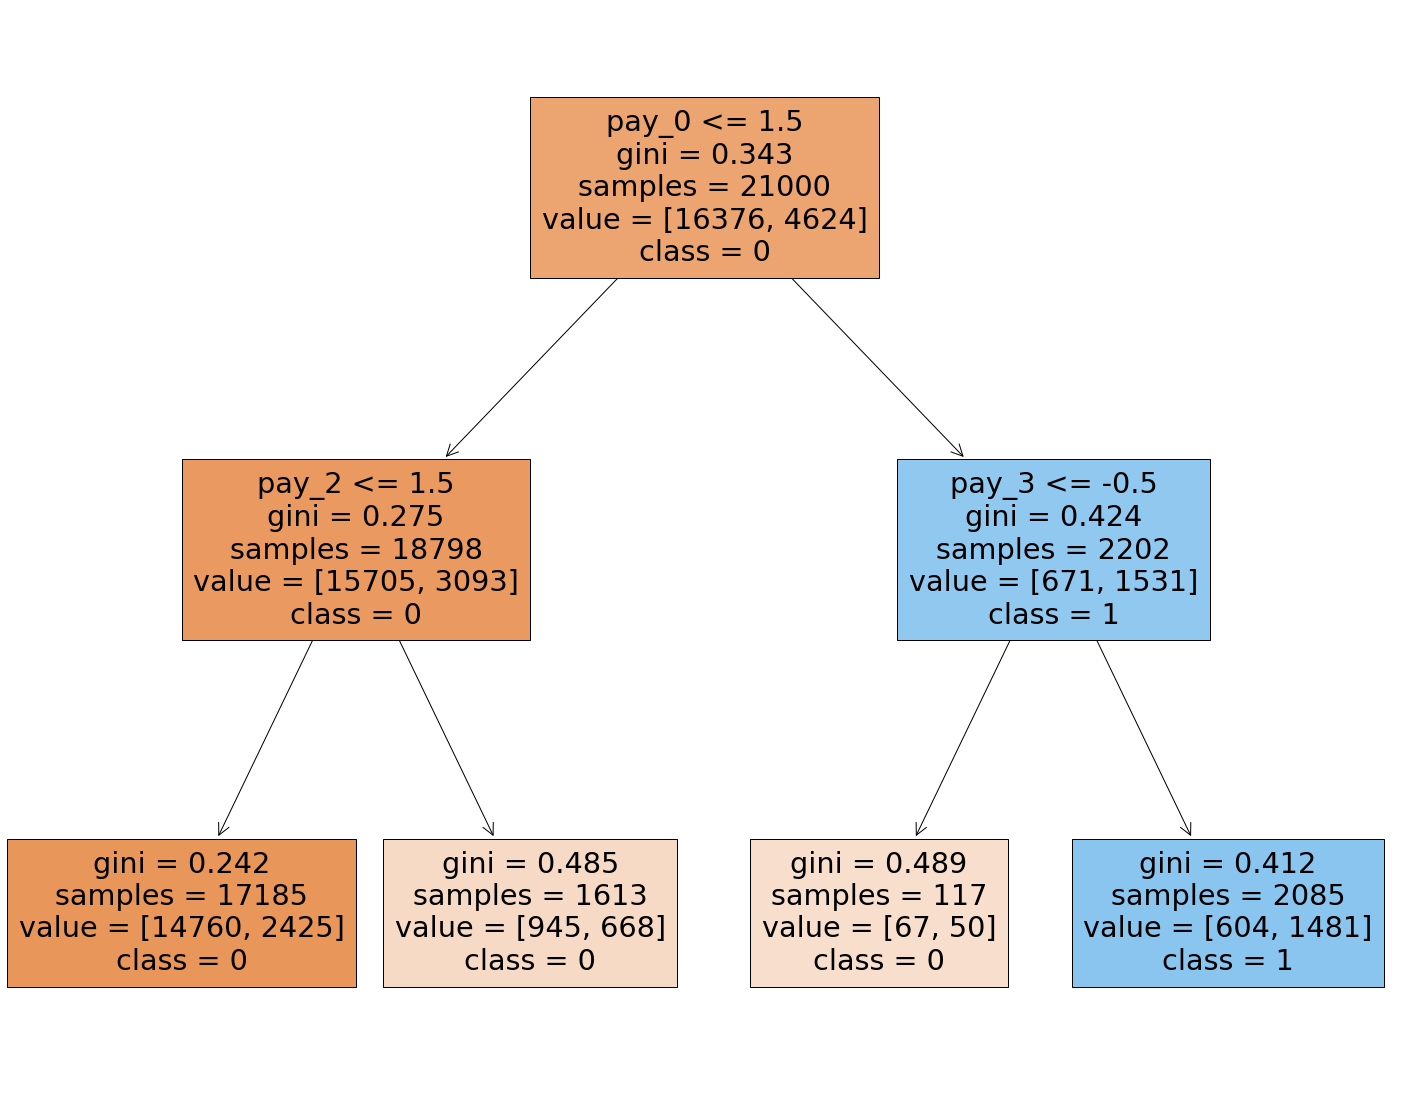

In [41]:
fig = plt.figure(figsize=(25,20))
tree = plot_tree(model, feature_names=X.columns,class_names=['0', '1', '2', '3'], filled=True)

<b>

<b>When limited to 2 decisions, the algroithm uses their payment history to determine if a customer will default on the loan. This is just as accurate as using demographic data as well.